In [5]:
#Get all our imports done with
import cv2
import numpy as np
import os
%config IPCompleter.greedy=True

In [6]:
#This whole block of code is sloppy and inefficient and has code that defeats the point of using other code and has code that isn't actually used, but it gets the job done for now. TODO: Format, cleanup unneeded bits of code

#Organizes the files into lists and a dict we can use for our algorithms and defines a function to 

#Change directory to the directory our data is stored in
os.chdir("E:\Users\Elliott\Documents\CKData\Emotion")
print("Current directory is: " + os.getcwd())

#Import emotion labels 
emotionIDList = ["Neutral", "Anger", "Contempt", "Disgust", "Fear", "Happiness", "Sadness", "Surprise"]
#Initialize dictionary and lists for storing emotion data and image file locations 
ImageIDEmotionPair = {}
peakEmotionFileLocations = []
neutralEmotionFileLocations = []

emotionsRootDir = "E:\Users\Elliott\Documents\CKData\Emotion"
imagesRootDir = "E:\Users\Elliott\Documents\CKData\extended-cohn-kanade-images\cohn-kanade-images"
for dirName, subDirList, fileList in os.walk(emotionsRootDir):
    if len(fileList) > 0:
        for fileName in fileList:
            #Change the directory to the directory containing the file we want to access
            lowestDir = os.path.normpath(fileName[:9].replace("_", "/"))
            os.chdir('E:\Users\Elliott\Documents\CKData\Emotion\%s' % (lowestDir))
            #Read the text from the .txt file that denotes the emotion of the penultimate image of a sequence
            fileEmotionTxt = open(fileName, "r")
            emotionNumID = int(fileEmotionTxt.read()[3:4])
            fileEmotionTxt.close()
            #Put the Photo IDs and the corresponding emotions(Number converted to a string of the emotion) together 
            #into a dict as a key:value pair
            slicedFileName = fileName[:17]
            ImageIDEmotionPair[slicedFileName] = emotionIDList[emotionNumID]
            neutralImage = imagesRootDir + os.path.normpath("/" + lowestDir + "/" + fileName[:15] + "00")
            #print(neutralImage)
            #Create a list of all the files with peak emotion and a list of all the neutral files (Could do this better in another os.walk for loop)
            peakEmotionFileLocations.append(imagesRootDir + os.path.normpath("/" + lowestDir + "/" + fileName[:17]))
            
#Iterating through the list directly with "for x in list" doesn't work here, hence the different for loop
for x in range(0, len(neutralEmotionFileLocations)):
    neutralEmotionFileLocations[x] = neutralEmotionFileLocations[x] + "00"
    
def getFileEmotion(fileLocation):
    fileLocation = fileLocation.replace(imagesRootDir, "")
    editedFileLocation = fileLocation[10:]
    return ImageIDEmotionPair[editedFileLocation]

print(getFileEmotion(peakEmotionFileLocations[0]))
print("\n\n\nPrinting dictionary of image file/emotion pairs:\n%s" % len(sorted(ImageIDEmotionPair.values())))
#print("\n" + getFileEmotion(peakEmotionFileLocations[0]))

    
    
    

Current directory is: E:\Users\Elliott\Documents\CKData\Emotion
Disgust



Printing dictionary of image file/emotion pairs:
327


In [7]:
#Convert the images to grayscale and isolate the faces --- Only needed to run once!!!
#opencv stuff is based off of http://www.paulvangent.com/2016/04/01/emotion-recognition-with-python-opencv-and-a-face-dataset/


# faceDet = cv2.CascadeClassifier("E:\Users\Elliott\opencv\sources\data\haarcascades\haarcascade_frontalface_default.xml")
# faceDet_two = cv2.CascadeClassifier("E:\Users\Elliott\opencv\sources\data\haarcascades\haarcascade_frontalface_alt2.xml")
# faceDet_three = cv2.CascadeClassifier("E:\Users\Elliott\opencv\sources\data\haarcascades\haarcascade_frontalface_alt.xml")
# faceDet_four = cv2.CascadeClassifier("E:\Users\Elliott\opencv\sources\data\haarcascades\haarcascade_frontalface_alt_tree.xml")


# def detectFaces(emotion):
#     filenumber = 0
#     currentEmotionFilesList = []
#     for fileName in peakEmotionFileLocations:
#         if getFileEmotion(fileName) == emotion:
#             currentEmotionFilesList.append(fileName)
#     for aFile in currentEmotionFilesList:
#         aFile = aFile + ".png"
#         #Image reading and conversion to grayscale 
#         frame = cv2.imread(aFile) #Open image
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale
        
#         #Detect face using 4 different classifiers
#         face = faceDet.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
#         face_two = faceDet_two.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
#         face_three = faceDet_three.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
#         face_four = faceDet_four.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)

        
#     #Go over detected faces, stop at first detected face, return empty if no face.
#         if len(face) == 1:
#             facefeatures = face
#         elif len(face_two) == 1:
#             facefeatures = face_two
#         elif len(face_three) == 1:
#             facefeatures = face_three
#         elif len(face_four) == 1:
#             facefeatures = face_four
#         else:
#             facefeatures = ""
    
#     #Cut and save face
#         for (x, y, w, h) in facefeatures: #get coordinates and size of rectangle containing face
#             print "Face found in file: %s" % aFile
#             gray = gray[y:y+h, x:x+w] #Cut the frame to size
        
#             try:
#                 out = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
#                 print("Writing file...")
#                 cv2.imwrite("E:\\Users\\Elliott\\Documents\\CKData\\EditedGrayScaleFaces\\%s\\%s.jpg" %(emotion, filenumber), out) #Write image
#             except:
#                 pass #If error, pass file
#         filenumber += 1 #Increment image number
        
# #Edited to avoid neutral until made compatible
# for emotion in emotionIDList[1:8]:
#     os.makedirs("E:\\Users\\Elliott\\Documents\\CKData\\EditedGrayScaleFaces\\%s" % emotion)
#     print(emotion)
#     detectFaces(emotion) #Call function
       

In [8]:
#Organize the data into training and prediction sets
from random import shuffle
def splitEmotionData(emotion):
    currentDir = "E:\\Users\\Elliott\\Documents\\CKData\\EditedGrayScaleFaces\\%s" % emotion
    currentEmotionFilesList = []
    for aFile in os.listdir(currentDir):
        currentEmotionFilesList.append(currentDir + os.path.normpath("/" + aFile))
    shuffle(currentEmotionFilesList)
    trainingSet = currentEmotionFilesList[:int(len(currentEmotionFilesList) * .8)]
    testingSet = currentEmotionFilesList[-int(len(currentEmotionFilesList) * .2):]
#     print(len(trainingSet))
#     print(len(testingSet))
    #Length is one off but we worry about that later
#     print(len(currentEmotionFilesList))
    
    return trainingSet, testingSet
    
def createSets():
    trainingSetFiles = []
    trainingEmotions = []
    testingSetFiles = []
    testingEmotions = []
    for emotion in emotionIDList[1:8]:
        training, testing = splitEmotionData(emotion)
        #Create emotion labels for each set
        for item in training:
            item = item
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            trainingSetFiles.append(gray) #append image array to training data list
            trainingEmotions.append(emotionIDList.index(emotion))
        for item in testing:
            item = item
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            testingSetFiles.append(gray)
            testingEmotions.append(emotionIDList.index(emotion))
            
    return trainingSetFiles, trainingEmotions, testingSetFiles, testingEmotions

In [129]:
#run tests
fisherFaces = cv2.createFisherFaceRecognizer()


def runFisherFaces():
    trainingSetFiles, trainingEmotions, testingSetFiles, testingEmotions = createSets()
    incorrectEmotions = {}
    correctEmotions = {}
    for emotion in emotionIDList[1:8]:
        incorrectEmotions[emotion] = 0
        correctEmotions[emotion] = 0
    print "\n\nTraining fisher face classifier..."
    print "Size of training set is:", len(trainingEmotions), "images"
    fisherFaces.train(trainingSetFiles, np.asarray(trainingEmotions))

    print "\nPredicting emotions of testing set... size of testing set is %d" % (len(testingEmotions))
    count = 0
    correct = 0
    incorrect = 0
    for image in testingSetFiles:
        pred, conf = fisherFaces.predict(image)
        if pred == testingEmotions[count]:
            correctEmotions[emotionIDList[testingEmotions[count]]] += 1
            correct += 1
            count += 1
        else:
            incorrectEmotions[emotionIDList[testingEmotions[count]]] += 1
            incorrect += 1
            count += 1
    return ((100*correct)/(correct + incorrect)), incorrectEmotions, correctEmotions

#Now run it
fisher_metascore = []
# confMatrix = {}
# for emotion in emotionIDList[1:7]:
#     tempList = []
#     confMatrix[emotion] = tempList
for i in range(0,5):
    correct, amountIncorrectPerEmotion, amountCorrectPerEmotion = runFisherFaces()
    print ("Got %s percent correct!" % str(correct))
    for x in range(1, len(emotionIDList[1:8]) + 1):
        amountCorrect = amountCorrectPerEmotion[emotionIDList[x]]
        amountIncorrect = amountIncorrectPerEmotion[emotionIDList[x]]
        percentCorrectForEmotion = (100 * amountCorrect) / (amountCorrect + amountIncorrect)
        print("Amount correct for emotion(%s): %d" % (emotionIDList[x], amountCorrect))
        print("Percent of this emotion(%s) gotten correct: %.2f" % (emotionIDList[x], percentCorrectForEmotion))
        print("Amount incorrect for emotion(%s): %d" % (emotionIDList[x], amountIncorrect))
        print("Percent of this emotion(%s) gotten incorrect: %.2f\n" % (emotionIDList[x], 100 - percentCorrectForEmotion))
    
    fisher_metascore.append(correct)
fisherPercentCorrect = np.mean(fisher_metascore)
print "\nEnd score:", fisherPercentCorrect, "percent correct!"





Training fisher face classifier...
Size of training set is: 260 images

Predicting emotions of testing set... size of testing set is 62
Got 77 percent correct!
Amount correct for emotion(Anger): 6
Percent of this emotion(Anger) gotten correct: 66.00
Amount incorrect for emotion(Anger): 3
Percent of this emotion(Anger) gotten incorrect: 34.00

Amount correct for emotion(Contempt): 2
Percent of this emotion(Contempt) gotten correct: 66.00
Amount incorrect for emotion(Contempt): 1
Percent of this emotion(Contempt) gotten incorrect: 34.00

Amount correct for emotion(Disgust): 9
Percent of this emotion(Disgust) gotten correct: 81.00
Amount incorrect for emotion(Disgust): 2
Percent of this emotion(Disgust) gotten incorrect: 19.00

Amount correct for emotion(Fear): 1
Percent of this emotion(Fear) gotten correct: 20.00
Amount incorrect for emotion(Fear): 4
Percent of this emotion(Fear) gotten incorrect: 80.00

Amount correct for emotion(Happiness): 11
Percent of this emotion(Happiness) gotte

In [43]:
eigenFaces = cv2.createEigenFaceRecognizer()

def runEigenFaces():
    trainingSetFiles, trainingEmotions, testingSetFiles, testingEmotions = createSets()
    incorrectEmotions = {}
    correctEmotions = {}
    for emotion in emotionIDList[1:8]:
        incorrectEmotions[emotion] = 0
        correctEmotions[emotion] = 0
    print "\n\nTraining eigen face classifier..."
    print "Size of training set is:", len(trainingEmotions), "images"
    eigenFaces.train(trainingSetFiles, np.asarray(trainingEmotions))

    print "\nPredicting emotions of testing set... size of testing set is %d" % (len(testingEmotions))
    count = 0
    correct = 0
    incorrect = 0
    for image in testingSetFiles:
        pred, conf = eigenFaces.predict(image)
        if pred == testingEmotions[count]:
            correctEmotions[emotionIDList[testingEmotions[count]]] += 1
            correct += 1
            count += 1
        else:
            incorrectEmotions[emotionIDList[testingEmotions[count]]] += 1
            incorrect += 1
            count += 1
    return ((100*correct)/(correct + incorrect)), incorrectEmotions, correctEmotions

#Now run it
eigen_metascore = []
# confMatrix = {}
# for emotion in emotionIDList[1:7]:
#     tempList = []
#     confMatrix[emotion] = tempList
for i in range(0,5):
    correct, amountIncorrectPerEmotion, amountCorrectPerEmotion = runEigenFaces()
    print ("Got %s percent correct!" % str(correct))
    for x in range(1, len(emotionIDList[1:8]) + 1):
        amountCorrect = amountCorrectPerEmotion[emotionIDList[x]]
        amountIncorrect = amountIncorrectPerEmotion[emotionIDList[x]]
        percentCorrectForEmotion = (100 * amountCorrect) / (amountCorrect + amountIncorrect)
        print("Amount correct for emotion(%s): %d" % (emotionIDList[x], amountCorrect))
        print("Percent of this emotion(%s) gotten correct: %.2f" % (emotionIDList[x], percentCorrectForEmotion))
        print("Amount incorrect for emotion(%s): %d" % (emotionIDList[x], amountIncorrect))
        print("Percent of this emotion(%s) gotten incorrect: %.2f\n" % (emotionIDList[x], 100 - percentCorrectForEmotion))
    
    eigen_metascore.append(correct)

print "\nAverage score:", np.mean(eigen_metascore), "percent correct!"





Training eigen face classifier...
Size of training set is: 260 images

Predicting emotions of testing set... size of testing set is 62
Got 22 percent correct!
Amount correct for emotion(Anger): 1
Percent of this emotion(Anger) gotten correct: 11.00
Amount incorrect for emotion(Anger): 8
Percent of this emotion(Anger) gotten incorrect: 89.00

Amount correct for emotion(Contempt): 2
Percent of this emotion(Contempt) gotten correct: 66.00
Amount incorrect for emotion(Contempt): 1
Percent of this emotion(Contempt) gotten incorrect: 34.00

Amount correct for emotion(Disgust): 1
Percent of this emotion(Disgust) gotten correct: 9.00
Amount incorrect for emotion(Disgust): 10
Percent of this emotion(Disgust) gotten incorrect: 91.00

Amount correct for emotion(Fear): 0
Percent of this emotion(Fear) gotten correct: 0.00
Amount incorrect for emotion(Fear): 5
Percent of this emotion(Fear) gotten incorrect: 100.00

Amount correct for emotion(Happiness): 2
Percent of this emotion(Happiness) gotten 

In [42]:
LBPHFaces = cv2.createLBPHFaceRecognizer()

def runLBPHFaces():
    trainingSetFiles, trainingEmotions, testingSetFiles, testingEmotions = createSets()
    incorrectEmotions = {}
    correctEmotions = {}
    for emotion in emotionIDList[1:8]:
        incorrectEmotions[emotion] = 0
        correctEmotions[emotion] = 0
    print "\n\nTraining LBPH face classifier..."
    print "Size of training set is:", len(trainingEmotions), "images"
    LBPHFaces.train(trainingSetFiles, np.asarray(trainingEmotions))

    print "\nPredicting emotions of testing set... size of testing set is %d" % (len(testingEmotions))
    count = 0
    correct = 0
    incorrect = 0
    for image in testingSetFiles:
        pred, conf = LBPHFaces.predict(image)
        if pred == testingEmotions[count]:
            correctEmotions[emotionIDList[testingEmotions[count]]] += 1
            correct += 1
            count += 1
        else:
            incorrectEmotions[emotionIDList[testingEmotions[count]]] += 1
            incorrect += 1
            count += 1
    return ((100*correct)/(correct + incorrect)), incorrectEmotions, correctEmotions

#Now run it
LBPHmetascore = []
# confMatrix = {}
# for emotion in emotionIDList[1:7]:
#     tempList = []
#     confMatrix[emotion] = tempList
for i in range(0,5):
    correct, amountIncorrectPerEmotion, amountCorrectPerEmotion = runLBPHFaces()
    print ("Got %s percent correct!" % str(correct))
    for x in range(1, len(emotionIDList[1:8]) + 1):
        amountCorrect = amountCorrectPerEmotion[emotionIDList[x]]
        amountIncorrect = amountIncorrectPerEmotion[emotionIDList[x]]
        percentCorrectForEmotion = (100 * amountCorrect) / (amountCorrect + amountIncorrect)
        print("Amount correct for emotion(%s): %d" % (emotionIDList[x], amountCorrect))
        print("Percent of this emotion(%s) gotten correct: %.2f" % (emotionIDList[x], percentCorrectForEmotion))
        print("Amount incorrect for emotion(%s): %d" % (emotionIDList[x], amountIncorrect))
        print("Percent of this emotion(%s) gotten incorrect: %.2f\n" % (emotionIDList[x], 100 - percentCorrectForEmotion))
    
    LBPHmetascore.append(correct)

print "\nAverage score:", np.mean(LBPHmetascore), "percent correct!"



Training LBPH face classifier...
Size of training set is: 260 images

Predicting emotions of testing set... size of testing set is 62
Got 19 percent correct!
Amount correct for emotion(Anger): 0
Percent of this emotion(Anger) gotten correct: 0.00
Amount incorrect for emotion(Anger): 9
Percent of this emotion(Anger) gotten incorrect: 100.00

Amount correct for emotion(Contempt): 1
Percent of this emotion(Contempt) gotten correct: 33.00
Amount incorrect for emotion(Contempt): 2
Percent of this emotion(Contempt) gotten incorrect: 67.00

Amount correct for emotion(Disgust): 0
Percent of this emotion(Disgust) gotten correct: 0.00
Amount incorrect for emotion(Disgust): 11
Percent of this emotion(Disgust) gotten incorrect: 100.00

Amount correct for emotion(Fear): 0
Percent of this emotion(Fear) gotten correct: 0.00
Amount incorrect for emotion(Fear): 5
Percent of this emotion(Fear) gotten incorrect: 100.00

Amount correct for emotion(Happiness): 3
Percent of this emotion(Happiness) gotten 

Metascore plots



Fisher Metascore Plot


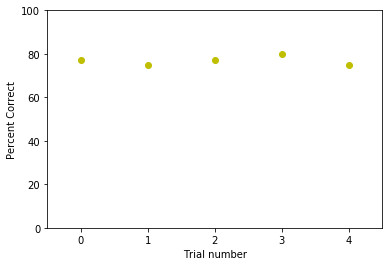

Average percent correct for Fisher: 76.800000


Eigen Metascore Plot


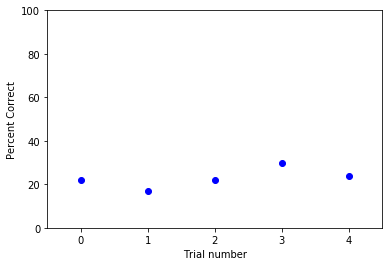

Average percent correct for Eigen: 23.000000


LBPH Metascore Plot


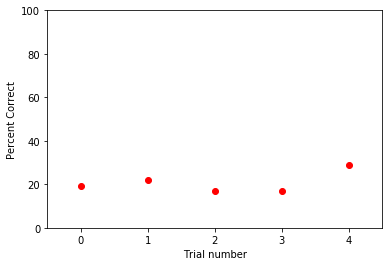

Average percent correct for LBPH: 20.800000



Combined ML Metascore Plot


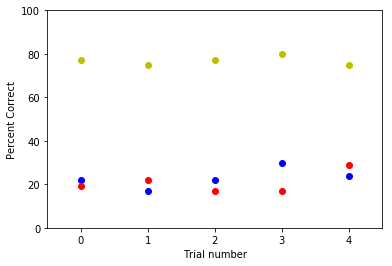





Percent Correct for Each Image in the Survey


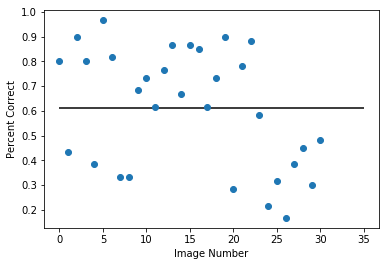

Average percent correct for humans: 0.610215


In [133]:
#Data analysis START
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display

print("Metascore plots\n")
print("\n\nFisher Metascore Plot")
plt.plot(fisher_metascore, "yo")
plt.axis([-.5, 4.5, 0, 100])
plt.ylabel("Percent Correct")
plt.xlabel("Trial number")
plt.show()
print("Average percent correct for Fisher: %f" % np.mean(fisher_metascore))

print("\n\nEigen Metascore Plot")
plt.plot(eigen_metascore, "bo")
plt.axis([-.5, 4.5, 0, 100])
plt.ylabel("Percent Correct")
plt.xlabel("Trial number")
plt.show()
print("Average percent correct for Eigen: %f" % np.mean(eigen_metascore))

print("\n\nLBPH Metascore Plot")
plt.plot(LBPHmetascore, "ro")
plt.axis([-.5, 4.5, 0, 100])
plt.ylabel("Percent Correct")
plt.xlabel("Trial number")
plt.show()
print("Average percent correct for LBPH: %f" % np.mean(LBPHmetascore))

#print combined
print("\n\n\nCombined ML Metascore Plot")
plt.plot(fisher_metascore, "yo", label="Fisher")
plt.plot(eigen_metascore, "bo")
plt.plot(LBPHmetascore, "ro")
plt.ylabel("Percent Correct")
plt.xlabel("Trial number")
plt.axis([-.5, 4.5, 0, 100])
plt.show()


surveyFinalNumbers = pd.read_csv("E:\Users\Elliott\Downloads\FinalSurveyData60.csv")
#Get percents correct from survey
surveyPercentsCorrectPerImage = []
for i in range(1, 32):
    string = "Image %d" % (i)
    surveyPercentsCorrectPerImage.append(surveyFinalNumbers[string][2])

    #TODO: ADD CHARTS OF INDIVIDUAL EMOTION PERCENTS CORRECT FOR SURVEY
print("\n\n\n\nPercent Correct for Each Image in the Survey")
plt.plot(surveyPercentsCorrectPerImage, "o")
plt.hlines(np.mean(surveyPercentsCorrectPerImage), 0, 35)
plt.ylabel("Percent Correct")
plt.xlabel("Image Number")
plt.show()

print("Average percent correct for humans: %f" % (np.mean(surveyPercentsCorrectPerImage)))
